# **LOGISTIC REGRESSION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Visualizing the Data**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ex2data1.txt", delimiter=',' )

X, y = np.split(data,[-1],axis=1) #splitting data into x and y

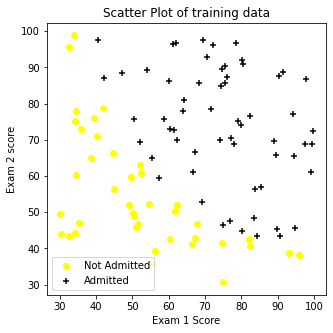

In [ ]:
plt.figure(figsize=(5,5))

plt.title('Scatter Plot of training data')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')

# getting X values with label 0 and 1 and plotting them 
label_0 = np.where(y == 0)[0]
plt.scatter(X[label_0, 0], X[label_0, 1], marker = "o", c= 'yellow', label = "Not Admitted")

label_1 = np.where(y == 1)[0]
plt.scatter(X[label_1, 0], X[label_1, 1], marker = "+", c= 'black', label = "Admitted")

plt.legend()
plt.show()

## **Implementation**

### **Sigmoid Function** 

In [ ]:
def sigmoid(h_x):
    sigmoid_func = 1 / (1 + np.exp(- h_x))
    #print(sigmoid_func)
    return sigmoid_func

### **Cost and Gradient Function** 

In [ ]:
def cost_function(theta, x, y, h_x):
    m = x.shape[0]
    cost = - (1 / m) * np.sum(y  * np.log(sigmoid(h_x)) + (1 - y) * np.log(1 - sigmoid(h_x)))
    return cost


def gradient_func(x, y, h_x):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(h_x) - y)

### **Learning Parameters and Plotting** 

In [ ]:
mean = np.mean(X, axis = 0)  
standard_dev = np.std(X, axis= 0, ddof = 1)
# (X- mean) / standard_dev
X = (X - mean) / standard_dev
X = np.hstack((np.ones((len(X),1)), X))

In [ ]:
theta = np.zeros((X.shape[1], 1))
learning_rate = 0.6
iterations = 1000
m = X.shape[0] 

for i in range(iterations):
    h_x = np.dot(X, theta)
    # updating weights
    theta = theta - (learning_rate) * gradient_func(X, y, h_x)
    # calcuating cost
    cost = cost_function(theta, X, y, h_x)
  
print(theta, cost)

[[1.69980781]
 [3.9728759 ]
 [3.70517347]] 0.20350775528825701


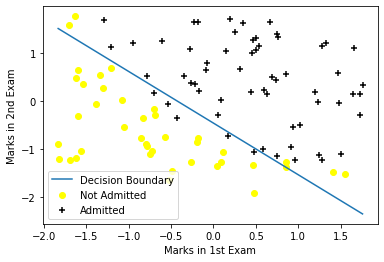

In [ ]:
# decision boundary 
x_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_values = - (theta[0] + (theta[1] * x_values)) / theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')

# data values
label_0 = np.where(y == 0)[0]
label_1 = np.where(y == 1)[0]
plt.scatter(X[label_0, 1], X[label_0, 2], marker = "o", c= 'yellow', label = "Not Admitted")
plt.scatter(X[label_1, 1], X[label_1, 2], marker = "+", c= 'black', label = "Admitted")

plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

### **Evaluating Logistic Regression** 

In [ ]:
# predict function 
def predict(x):
    h_x = np.dot(x, theta)
    return sigmoid(h_x)

In [ ]:
X_predict = np.array([[45, 85]])
# normalizing 
X_predict = (X_predict - mean) / standard_dev
X_predict = np.c_[np.ones((X_predict.shape[0], 1)), X_predict]
# predicting
y_predict = predict(X_predict)

print(y_predict)

[[0.77362036]]


# **REGULARIZED LOGISTIC REGRESSION**

## **Visualizing the Data**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ex2data2.txt", delimiter=',' )

X, y = np.split(data,[-1],axis=1) #splitting data into x and y

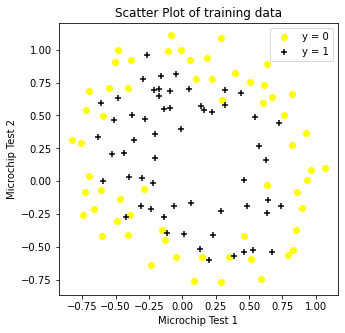

In [ ]:
plt.figure(figsize=(5,5))

plt.title('Scatter Plot of training data')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# getting X values with label 0 and 1 and plotting them 
label_0 = np.where(y == 0)[0]
label_1 = np.where(y == 1)[0]

plt.scatter(X[label_0, 0], X[label_0, 1], marker = "o", c= 'yellow', label = "y = 0")
plt.scatter(X[label_1, 0], X[label_1, 1], marker = "+", c= 'black', label = "y = 1")

plt.legend()
plt.show()

## **Feature Mapping**

In [ ]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

## **Cost and Gradient Function**

In [ ]:
# sigmoid func
def sigmoid(h_x):
    sigmoid_func = 1 / (1 + np.exp(- h_x))
    #print(sigmoid_func)
    return sigmoid_func


def cost_function(theta, x, y, h_x, lambda_t):
    m = x.shape[0]
    cost = - (1 / m) * np.sum(y  * np.log(sigmoid(h_x)) + (1 - y) * np.log(1 - sigmoid(h_x)))
    reg = (lambda_t / (2 * m) ) * (theta[1:].T @ theta[1:])
    return cost + reg


def gradient_func(theta, x, y, h_x, lambda_t):
    m = x.shape[0]
    gradient = (1 / m) * np.dot(x.T, sigmoid(h_x) - y) 
    gradient[1:] = gradient[1:] + (lambda_t / m) * theta[1:]
    return gradient

### **Learning Parameters and Plotting** 

In [ ]:
# feature mapping
X = mapFeature(np.array(X[:,:1]), np.array(X[:,1:2]))

In [ ]:
theta = np.zeros((X.shape[1], 1))
lambda_t = 1

h_x = np.dot(X, theta)
cost = cost_function(theta, X, y, h_x, lambda_t)
print("Initial cost:" , cost)

Initial cost: [[0.69314718]]


In [ ]:
# gradient descent 

theta = np.zeros((X.shape[1], 1))
lambda_t = 1
learning_rate = 0.5
iterations = 1000
m = X.shape[0] 

for i in range(iterations):
    h_x = np.dot(X, theta)
    # updating weights
    theta = theta - (learning_rate) * gradient_func(theta, X, y, h_x, lambda_t)
    # calcuating cost
    cost = cost_function(theta, X, y, h_x, lambda_t)
  
print("Cost: ", cost)

Cost:  [[0.52900391]]


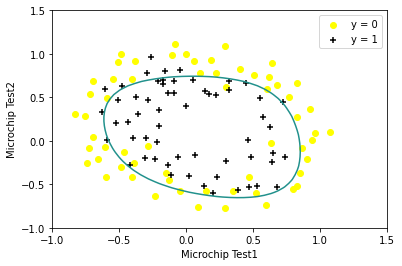

In [ ]:
# decision boundary 
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)


label_0 = np.where(y == 0)[0]
label_1 = np.where(y == 1)[0]
plt.scatter(X[label_0, 1], X[label_0, 2], marker = "o", c= 'yellow', label = "y = 0")
plt.scatter(X[label_1, 1], X[label_1, 2], marker = "+", c= 'black', label = "y = 1")

decision_boundary = plt.contour(u, v, z, 0)

plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')

plt.legend()
plt.show()

### **Different Regularization Parameters** 

Cost:  [[0.68648382]]


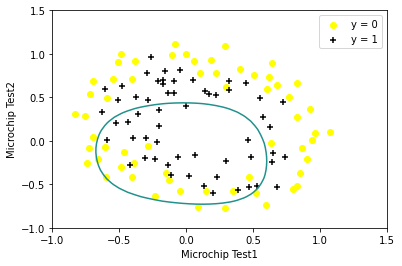

In [ ]:
theta = np.zeros((X.shape[1], 1))
lambda_t = 100
learning_rate = 0.5
iterations = 1000
m = X.shape[0] 

for i in range(iterations):
    h_x = np.dot(X, theta)
    # updating weights
    theta = theta - (learning_rate) * gradient_func(theta, X, y, h_x, lambda_t)
    # calcuating cost
    cost = cost_function(theta, X, y, h_x, lambda_t)

print("Cost: ", cost)


# decision boundary 
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))


for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)


label_0 = np.where(y == 0)[0]
label_1 = np.where(y == 1)[0]
plt.scatter(X[label_0, 1], X[label_0, 2], marker = "o", c= 'yellow', label = "y = 0")
plt.scatter(X[label_1, 1], X[label_1, 2], marker = "+", c= 'black', label = "y = 1")

decision_boundary = plt.contour(u, v, z, 0)

plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')

plt.legend()
plt.show()

Cost: [[0.33427637]]


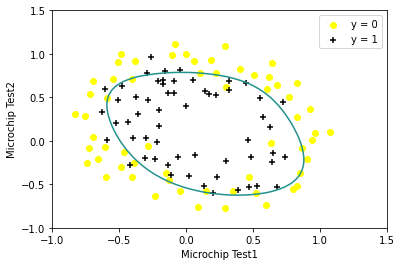

In [ ]:
theta = np.zeros((X.shape[1], 1))
lambda_t = 0
learning_rate = 0.3
iterations = 5000
m = X.shape[0] 

for i in range(iterations):
    h_x = np.dot(X, theta)
    # updating weights
    theta = theta - (learning_rate) * gradient_func(theta, X, y, h_x, lambda_t)
    # calcuating cost
    cost = cost_function(theta, X, y, h_x, lambda_t)

print("Cost:", cost)

# decision boundary 
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))


for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)


label_0 = np.where(y == 0)[0]
label_1 = np.where(y == 1)[0]
plt.scatter(X[label_0, 1], X[label_0, 2], marker = "o", c= 'yellow', label = "y = 0")
plt.scatter(X[label_1, 1], X[label_1, 2], marker = "+", c= 'black', label = "y = 1")

decision_boundary = plt.contour(u, v, z, 0)

plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')

plt.legend()
plt.show()